# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [79]:
m = 1
A = 0.0492645084166179#0.001#0.049375#5#0.0492645084166179#0.049264507293701174#0.049264508247375494#0.04925#0.0493#0.001#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [80]:
global loggrid=false#true
global bisection=false
global meshrefinement=false;

In [81]:
using Quadmath, Printf

res=m;
N=2.0^m*4000.0/2.0#Nt=2.0^m*1000.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*4000.0/2.0#Nt=2.0^m*1000.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [82]:
print(N)

4000.0

In [83]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.00025
dt =0.000125
dx/dt =2.0


In [84]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA" #~/data/ritapsantos/
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [85]:
using Printf
include("./ScalarField.jl");

In [86]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.00025
the time step is 0.000125


# Initial data of m β Ψ and Ψ,x

In [87]:
using Dierckx
using Quadmath


####
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [88]:
y0=[0 0 0]

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

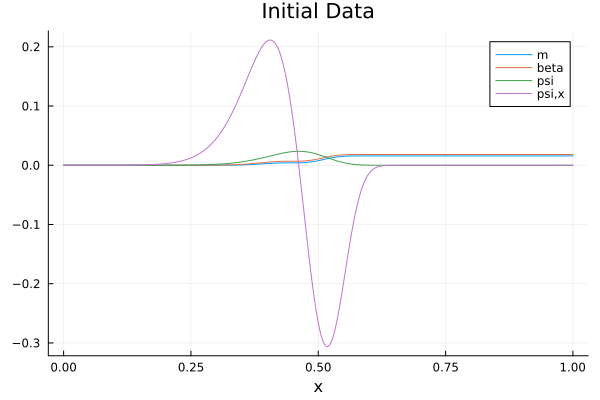

In [89]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [90]:
using CSV, Tables, Printf
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [91]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [92]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0010003751250394


In [93]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

In [94]:
#global dt = 5e-5/2/2/2 #RES3
#global dt = 5e-5/2/2

In [ ]:
968938812

fixed grid

In [95]:
finaltime=1.3#1.6#2#1.3#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,run);#timeevolution(state_array,finaltime,dir*"/res$res",run,auxstate_array);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);



iteration 100 dt is 0.0002501250468906299, t=0.025012504689063034 speed is 0.49975003124999995, dx/dt=0.9995000624999999


iteration 200 dt is 0.00025012504689062986, t=0.05002500937812583 speed is 0.49975003125000006, dx/dt=0.9995000625000001


iteration 300 dt is 0.0002501250468906294, t=0.07503751406718889 speed is 0.49975003125000095, dx/dt=0.9995000625000019


iteration 400 dt is 0.000250125046890628, t=0.1000500187562523 speed is 0.4997500312500037, dx/dt=0.9995000625000074


iteration 500 dt is 0.0002501250468906235, t=0.12506252344531474 speed is 0.49975003125001277, dx/dt=0.9995000625000254


iteration 600 dt is 0.00025012504689061045, t=0.15007502813437676 speed is 0.49975003125003886, dx/dt=0.9995000625000777


iteration 700 dt is 0.0002501250468905745, t=0.17508753282343625 speed is 0.49975003125011064, dx/dt=0.9995000625002213


iteration 800 dt is 0.0002501250468904809, t=0.20010003751248964 speed is 0.49975003125029765, dx/dt=0.9995000625005954


iteration 900 dt is 0.

 ## Movie of the evolution

In [96]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:100:3800#870
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    
    #functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/bisectionsearch/run1"*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

LoadError: BoundsError: attempt to access 207-element Vector{Float64} at index [4:4004]

In [115]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/monitor_ratio10.csv" is not a valid file or doesn't exist

# New test

In [237]:
include("./ScalarField.jl");

function ff(x)

    return x^2

end
function grid(x)

    return(1/2+1/2*cos(pi*(1-0.9*x)))

end;

In [238]:
res=1

dx=0.1

x=range(-3*dx,1+3*dx,step=dx)

y=ff.(x);

In [239]:
L=length(x)

aux=zeros(L)


for i in 4:L-3

    aux[i]=Dertest(y,i,x)

end

println(aux[4:L-3]);
xnew=grid.(x)
ynew=ff.(xnew);

[3.469446951953615e-16, 0.19999999999999996, 0.3999999999999998, 0.6000000000000004, 0.8, 1.0, 1.2, 1.3999999999999995, 1.6000000000000003, 1.8000000000000018, 1.9999999999999978]


In [240]:
spl=Spline1D(xnew[4:L-3],ynew[4:L-3],k=4)
auxnew=zeros(L);

for i in 4:L-3
    auxnew[i]=unevenDer(ynew,i,xnew,spl)
end

println(" ")
println(auxnew[4:L-3])
println(" ")
println(2 .* xnew[4:L-3])

WWWWWWWWWWWWWWWWWWWWAAAAAAAAA 
[1.8494949330273436e-15, 0.043885351791287275, 0.15567207449798512, 0.33868813467634756, 0.5742207084349278, 0.8435655349597687, 1.1253332335643045, 1.3971478906347807, 1.6374239897486917, 1.8270805742745604, 1.9510565162951545]
 
[0.0, 0.039706314323056935, 0.15567207449798492, 0.3386881346763483, 0.5742207084349277, 0.8435655349597689, 1.1253332335643045, 1.3971478906347805, 1.63742398974869, 1.8270805742745622, 1.9510565162951536]


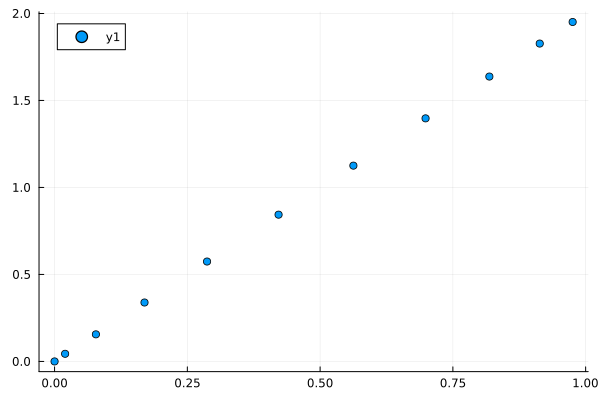

In [243]:

#plot(x,y)

scatter(xnew[4:L-3],auxnew[4:L-3])#,xlim=[0,0.2])

#plot(x[4:L-3],aux[4:L-3])

In [242]:
auxnew[L-3]

1.9510565162951545